## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/drive')
drive_path = '/drive/My Drive/Capstone Project/Hotel Bookings.csv'
df = pd.read_csv(drive_path)

Mounted at /drive


In [ ]:
df1= df.copy()

# **Data Exploration**

In [ ]:
# Checking first 5 rows
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#checking the shape ( rows and column numbers)
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [ ]:
# Checking last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data Description:**

**1. hotel :** Hotel(Resort Hotel or City Hotel)

**2. is_canceled :** Value indicating if the booking was canceled (1) or not (0)

**3. lead_time :** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**4. arrival_date_year :** Year of arrival date

**5. arrival_date_month :** Month of arrival date

**6. arrival_date_week_number :** Week number of year for arrival date

**7. arrival_date_day_of_month :** Day of arrival date

**8. stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**9. stays_in_week_nights :** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**10. adults :** Number of adults

**11. children :** Number of children

**12. babies :** Number of babies

**13. meal :** Type of meal booked. Categories are presented in standard hospitality meal packages:

**14. country :**Country of origin.`

**15. market_segment :** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**16. distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**17. is_repeated_guest :**Value indicating if the booking name was from a repeated guest (1) or not (0)

**18. previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

**19. previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

**20. reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**21. assigned_room_type :** Code for the type of room assigned to the booking.

**22. booking_changes :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**23. deposit_type :**Indication on if the customer made a deposit to guarantee the booking.

**24. agent :** ID of the travel agency that made the booking

**25. company :** ID of the company/entity that made the booking or responsible for paying the booking.

**26. days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer

**27. customer_type :** Type of booking, assuming one of four categories

**a) adr :** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**b) required_car_parking_spaces :** Number of car parking spaces required by the customer

**c) total_of_special_requests :** Number of special requests made by the customer (e.g. twin bed or high floor)

**d) reservation_status :** Reservation last status, assuming one of three categories

***Cancelled –*** booking was canceled by the customer

***Check-Out –*** customer has checked in but already departed

***No-Show –*** customer did not check-in and did inform the hotel of the reason why

**1. reservation_status_date :** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [ ]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Data Cleaning**
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:

1.Remove duplicate rows.

2.Handling missing values.

3.Convert columns to appropriate datatypes.

4.Adding important columns





In [ ]:
# checking for the duplicate rows
df1.duplicated().value_counts()    #true means duplicate rows

False    87396
True     31994
dtype: int64

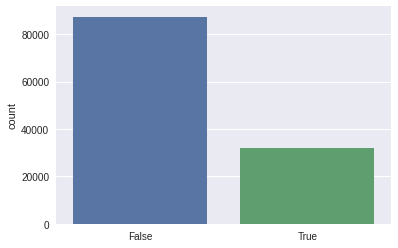

In [ ]:
# Checking for duplicated row
sns.countplot(x=df1.duplicated())

Hence, We have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

In [ ]:
#dropping the duplicate rows
df1= df1.drop_duplicates()

In [ ]:
# data set reduced
df1.shape

(87396, 32)

In [ ]:
#checking for Null Values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


Text(0.5, 1.0, 'Places of missing values in column')

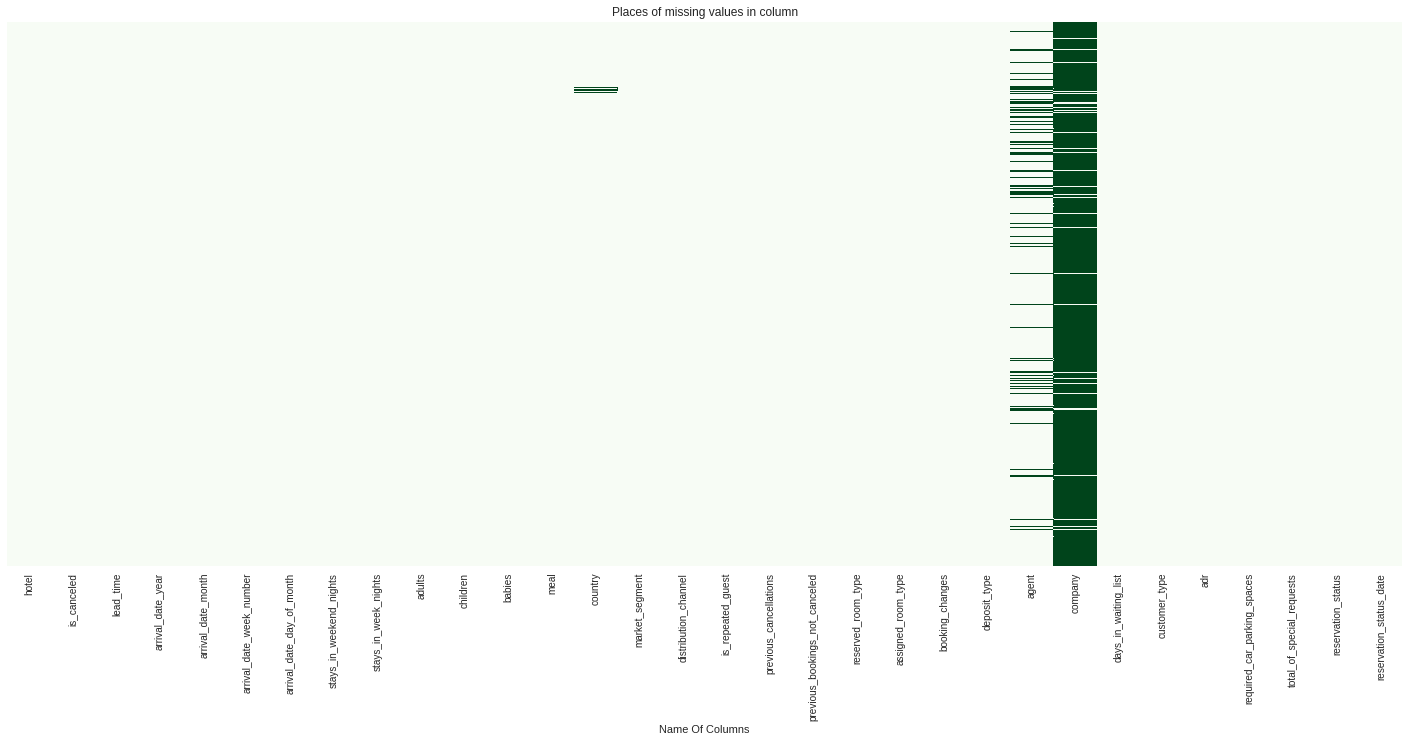

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False,cmap='Greens')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

**We have null values in Company, Agent, Children, Country:-**

We Have Null values in columns- Company, agent, Country,children.

1.For company and agent I will fill the Missing values with 0.

2.For country I will fill Missing values with Object 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)

3.As the counting of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [ ]:
df1.drop('company', axis=1, inplace=True)
null_columns = ['agent', 'children']
for col in null_columns:
    df1[col].fillna(0, inplace=True)
    
# Replacing NA values with other    
df1['country'].fillna('others', inplace=True)

In [ ]:
# Successfully handles null values
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
# dropping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
len(df1[df1['adults']+df1['babies']+df1['children']==0])
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace=True)

In [ ]:
# Lets add some new columns
df1['total_people'] = df1['adults']  + df1['babies'] + df1['children']
df1['total_stay'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

In [ ]:
# Checking the final rows and columns
df1.shape

(87230, 33)

**Exploratory Data Analysis (EDA):**


***Hotel Bookings Data***

**1. Which type of hotels is mostly preferred by the guests?**

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

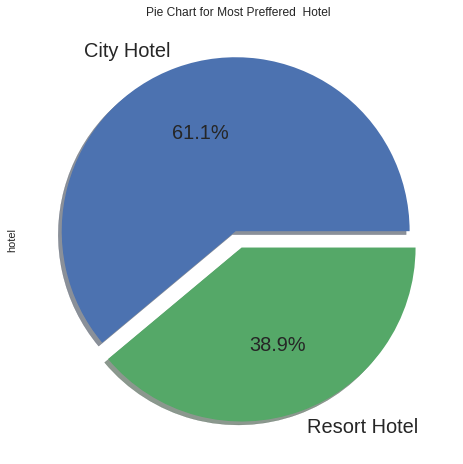

In [ ]:
# Visualizsing the by pie chart.
df1['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

**Observation 1:** City Hotel is more preferred by guest as compared to Resort Hotel. Thus, City hotel has maximum bookings as compared to Resort Hotel.

**2. Which agent made the most bookings?**

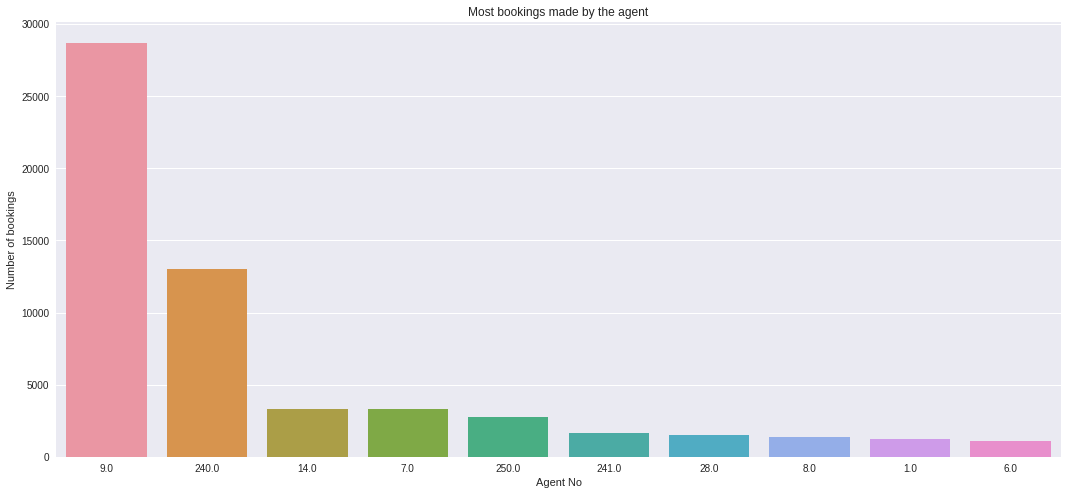

In [ ]:
hightest_bookings = df1.groupby(['agent']).size().reset_index().rename(columns={0:'Most_Bookings'}).sort_values(by="Most_Bookings", ascending=False)

# As agent 0 was NAN and we replaced it by 0 so it means 0 bookings
hightest_bookings.drop(hightest_bookings[hightest_bookings['agent'] == 0].index, inplace=True)
top_ten_highest_booking = hightest_bookings[:10]
top_ten_highest_booking = top_ten_highest_booking.sort_values(by='Most_Bookings', ascending=False)
plt.figure(figsize=(18, 8))
sns.barplot(x=top_ten_highest_booking['agent'], y=top_ten_highest_booking['Most_Bookings'], order=top_ten_highest_booking['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of bookings')
plt.title("Most bookings made by the agent")
plt.show()

**Observation 2:**The Agent ID- 9 had done most of the bookings.

**3. What is the percentage of cancellation of booked hotels?**

Text(0.5, 1.0, 'Cancellation and non Cancellation')

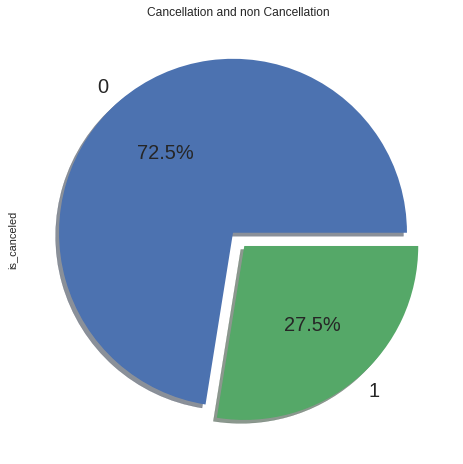

In [ ]:
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

**Observation 3:** 27.5 % of the bookings is cancelled.

**4. What is the percentage of repeated guests?**

Text(0.5, 1.0, ' Percentage of Repeated Guests')

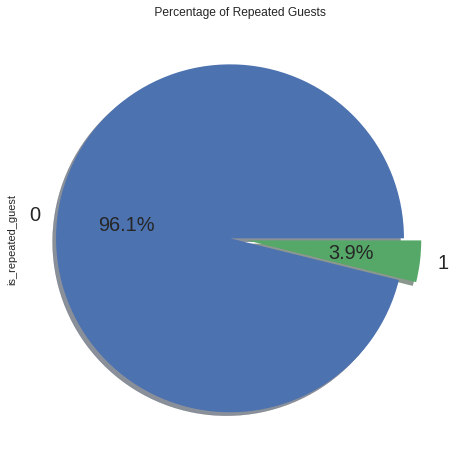

In [ ]:
df1['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentage of Repeated Guests")

**Observation 4:** Repeated guest are less in numbers that is 3.9% only.

In order to retained the guests/customers, management should take feedbacks from guests and try to imporve the services.

**5. What is the percentage distribution of *Customer Type*?**

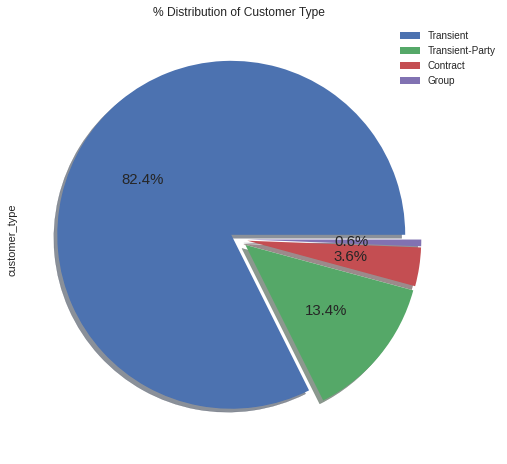

In [ ]:
df1['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=df1['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**1.Contract:** When the booking has an allotment or other type of contract associated to it

**2.Group:** When the booking is associated to a group

**3.Transient:** When the booking is not part of a group or contract, and is not associated to other transient booking

**4.Transient-party:** When the booking is transient, but is associated to at least other transient booking

**Observation:** Transient customer type is most which is 82.4 % while percentage of bookings associated by other groups is vey low.

**6. What is the most percentage of booking changes made by the customer?**

Text(0, 0.5, 'Percentage(%)')

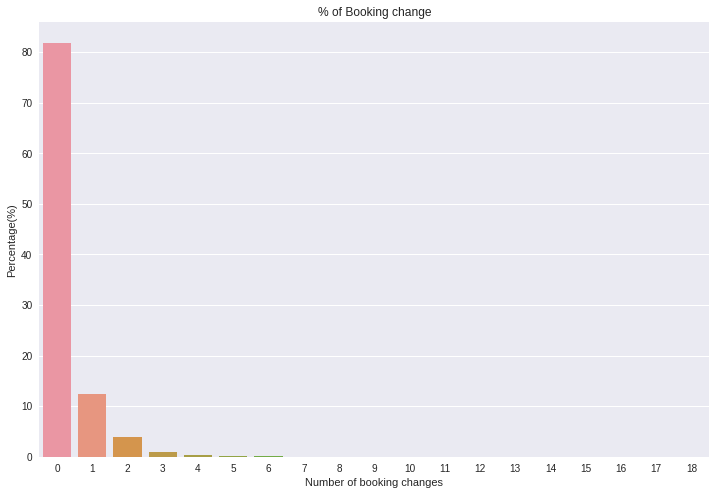

In [ ]:
booking_changes_df=df1['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df1.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

**Observation 6:** Almost 82% of the bookings was not changed by guests while approx. 10% bookings was changed by guests.

**7. Most preferred type of food by guests?**

Text(0.5, 1.0, 'Preferred Meal Type')

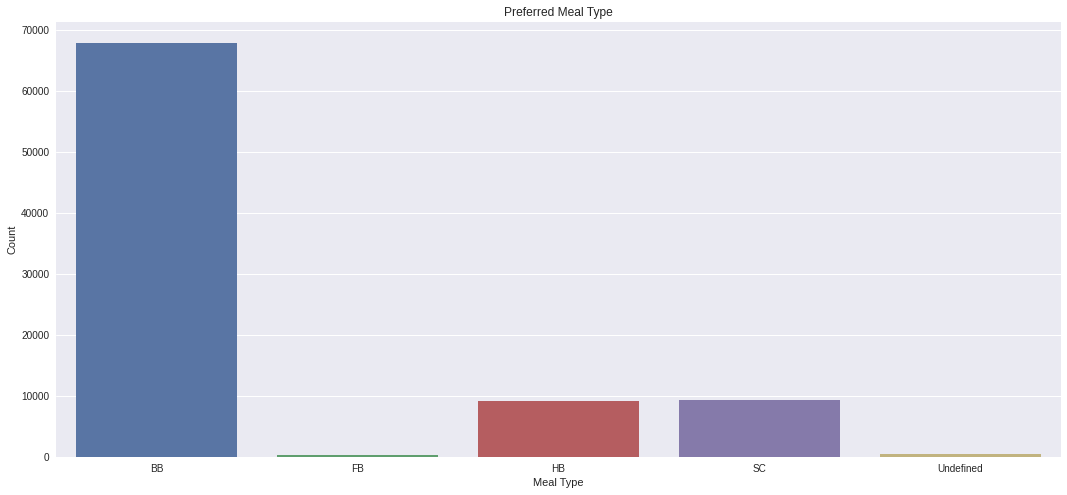

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x=df1['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

**Observation 7:**

The most preferred food by the customers is BB (Bed and Breakfast).
HB (Half Board) and SC (Self catering) are equally preferred.

**8. From which country the most guests are coming?**

Text(0.5, 1.0, 'Number of guests from different Country')

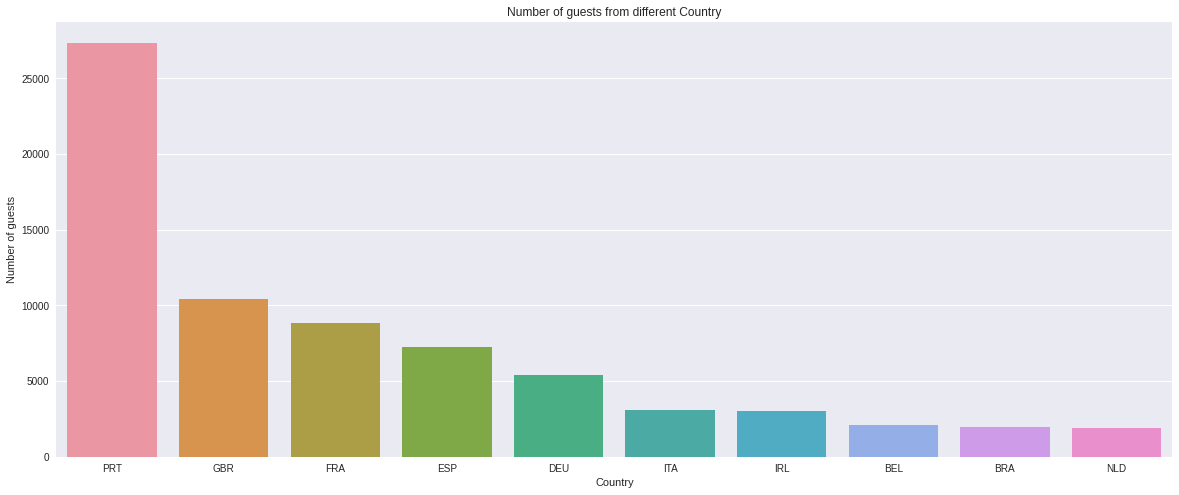

In [ ]:
country_df = df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

plt.figure(figsize=(20, 8))
sns.barplot(x=country_df['country'], y=country_df['count of guests'])
plt.xlabel("Country")
plt.ylabel("Number of guests")
plt.title("Number of guests from different Country")

**Observation 8:** Most of the guests are coming from Portugal (PRT) that is more than 25000 guests.

**Acronym used for Countries-**

PRT- Portugal

GBR- United Kingdom

FRA- France

ESP- Spain

DEU - Germany

ITA -Itlay

IRL - Ireland

BEL -Belgium

BRA -Brazil

NLD-Netherlands

**9. The most preferred room type by the customers?**

Text(0.5, 1.0, 'Most preferred Room Type')

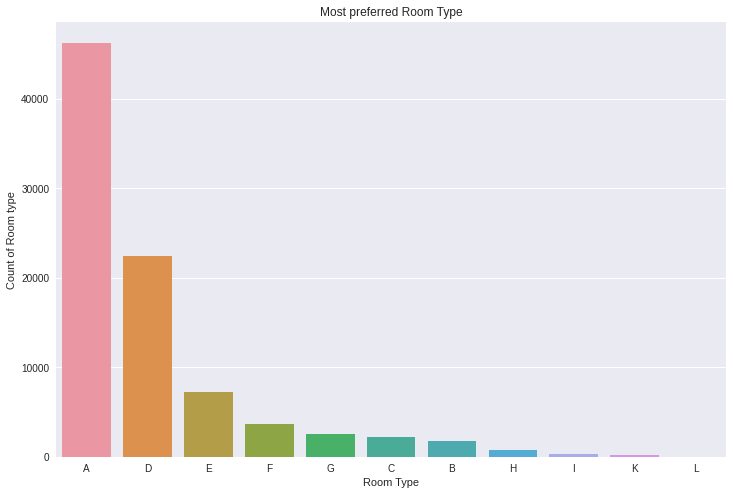

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df1['assigned_room_type'], order=df1['assigned_room_type'].value_counts().index)
plt.xlabel('Room Type')
plt.ylabel('Count of Room type')
plt.title('Most preferred Room Type')

**Observation 9**: The most preferred room type is A.

**10. Which year has the most hotel bookings?**

Text(0, 0.5, 'Bookings')

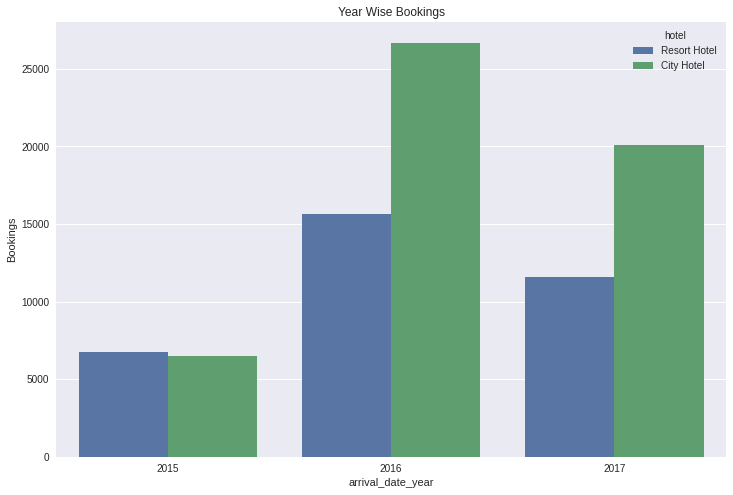

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df1['arrival_date_year'], hue=df1['hotel'])
plt.title('Year Wise Bookings')
plt.ylabel('Bookings')

**Observation 10:**

1. 2016 Year has the most bookings.

2. 2015 has less than 10,000 bookings.

3. While overall city hotels had the most of the bookings.


**11. Which hotels have the most repeated guests?**

Text(0.5, 1.0, 'Most repeated guests for each hotel')

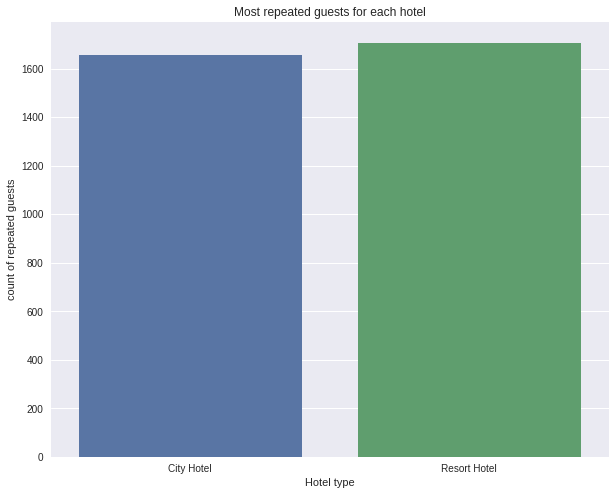

In [ ]:
repeated_guest_df = df1[df1['is_repeated_guest'] == 1].groupby('hotel')['is_repeated_guest'].size().reset_index().rename(columns={0:'Number_of_repeated_guests'})
plt.figure(figsize=(10, 8))
sns.barplot(x=repeated_guest_df['hotel'], y=repeated_guest_df['is_repeated_guest'])
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

**Observation 11:** Resort Hotel has slighlty more repeated guests as compared to City Hotel.

**12. Which distribution channel contributed more to ADR in order to increase the the income?**

Text(0.5, 1.0, 'ADR across Distribution channel')

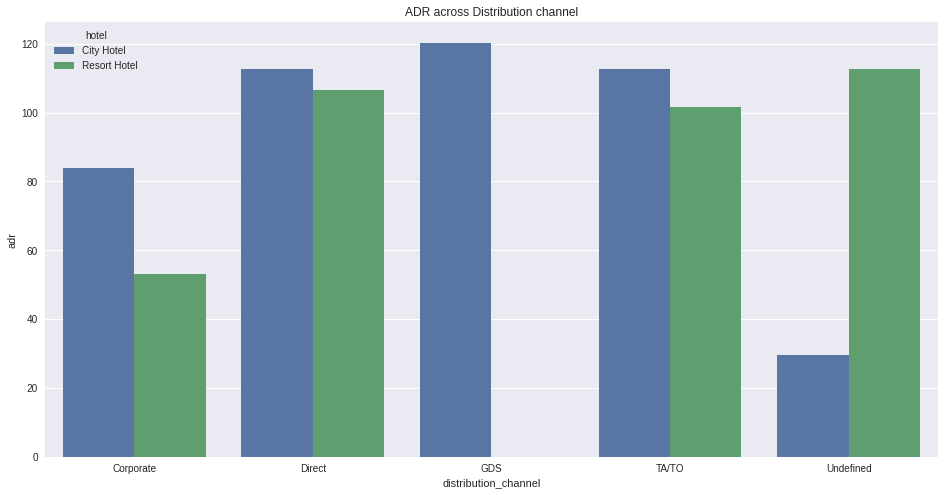

In [ ]:
distribution_channel_df = df1.groupby(['hotel', 'distribution_channel'])['adr'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

**Corporate-** These are corporate hotel booing companies which makes bookings possible.

**GDS-A GDS** is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.

**Direct-** means that bookings are directly made with the respective hotels.

**TA/TO-** means that booings are made through travel agents or travel operators.

**Undefined-** Bookings are undefined. may be customers made their bookings on arrival.

**Observation 20:**

1. 'Direct' and 'TA/TO' has almost equally contributed in ADR in both types of hotels.
2. GDS has highly contributed in ADR in 'City Hotel' type.
3. GDS need to increase Resort Hotel Bookings.

**13. What is the percentage distribution of required car parking spaces?**

In [ ]:
car_parking_space = df1['required_car_parking_spaces'].value_counts()
car_parking_space

0    79924
1     7273
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

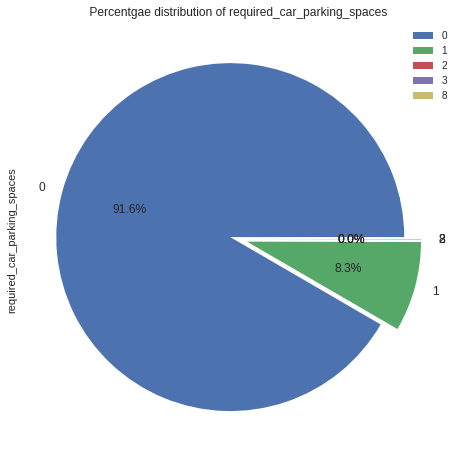

In [ ]:
# Visualising data by pie chart.

car_parking_space.plot.pie(explode=[0.05]*5,autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=12)

plt.title(" Percentgae distribution of required_car_parking_spaces ")
plt.legend()
plt.show() 

**Observation 13:** 
93.8 % guests did not required the parking space. Only 6.2 % guests required only 1 parking space


**14. What is Percentage distribution of Deposit type?**

In [ ]:
# Fetch the data from deposite_type

distrubution_of_deposite_type = df1['deposit_type'].value_counts()
distrubution_of_deposite_type

No Deposit    86085
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

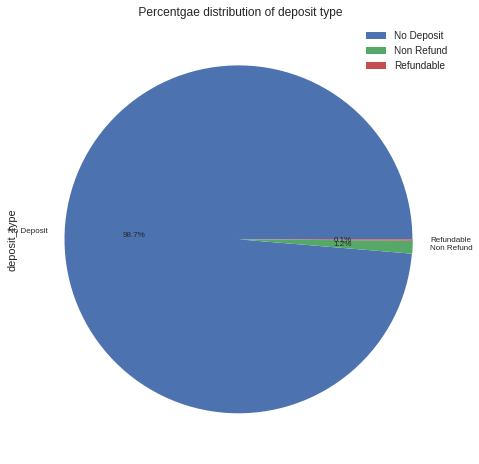

In [ ]:
# Visualizsing data by pie chart.

distrubution_of_deposite_type.plot.pie(explode=[0.001]*3, autopct='%1.1f%%', shadow=False, figsize=(20,8), fontsize=8)

plt.title(" Percentgae distribution of deposit type")
plt.legend()
plt.show() 

**Obdervation 14:** 98.7 % of the guests prefer **No deposit type** of stay.

**15. What is most preferred stay length in each hotel?**

In [ ]:
# creating dataframe for stay
stay_df = df1[df1['is_canceled']==0]
stay_df =stay_df[stay_df['total_stay'] < 15]
stay_df =stay_df.rename(columns={'is_canceled':'Number_of_stay'})

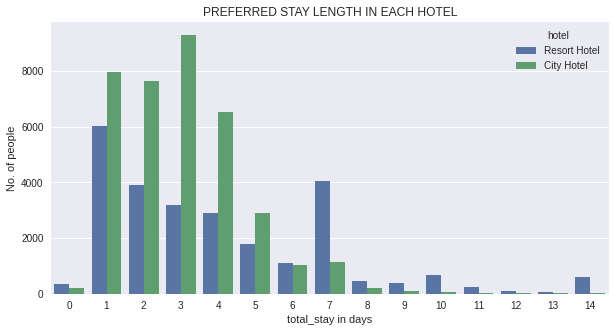

In [ ]:
# set plot size and plot barchart
plt.figure(figsize = (10,5))
plt.title('PREFERRED STAY LENGTH IN EACH HOTEL')
sns.countplot(x = stay_df['total_stay'], hue = stay_df['hotel'])

plt.xlabel('total_stay in days')
plt.ylabel('No. of people')
plt.show()

**Observation 15:** The optimal stay in both types of hotels is less than 7 days.

**16. Which hotel makes more revenue?**





In [ ]:
# dataframe for revenue
revenue_df = df1.groupby('hotel')['adr'].mean().reset_index().rename(columns={'adr':'avg_adr'})  # calculating average adr
revenue_df

,hotel,avg_adr
0,City Hotel,111.271969
1,Resort Hotel,99.059517


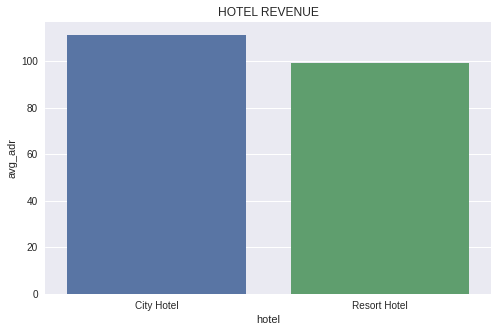

In [ ]:
plt.figure(figsize = (8,5))
plt.title('HOTEL REVENUE')

# Setting x and y value
sns.barplot(x = revenue_df['hotel'], y = revenue_df['avg_adr'])
plt.show()

**Observartion 16:** 

1.City hotels has slightly high average lead time than resort hotel.

2.Hence, city hotel makes slightly more revenue then resort hotel.

**17. For which hotel, does people have to wait longer to get a booking confirmed?**

In [ ]:
# dataframe of waiting for booking
waiting_df = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index().rename(columns = {'days_in_waiting_list':'Avg_waiting_time'})
waiting_df

,hotel,Avg_waiting_time
0,City Hotel,1.020066
1,Resort Hotel,0.316763


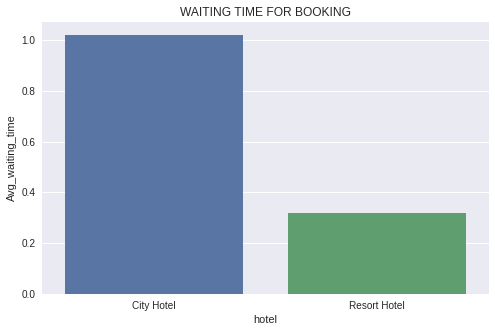

In [ ]:
plt.figure(figsize = (8,5))
plt.title('WAITING TIME FOR BOOKING')
sns.barplot(x = waiting_df['hotel'], y = waiting_df['Avg_waiting_time'] )
plt.show()

**Observation 17:**

1.City hotel has significantly longer waiting time then resort hotel.

2.Hence, City Hotel is much busier than Resort Hotel.

**18. Whether Stay is over a weekend or weekday?**

---



(0.0, 12.0)

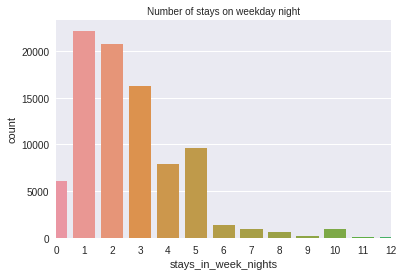

In [ ]:
sns.countplot(data = df1, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 10)
plt.xlim(0,12)

(0.0, 6.0)

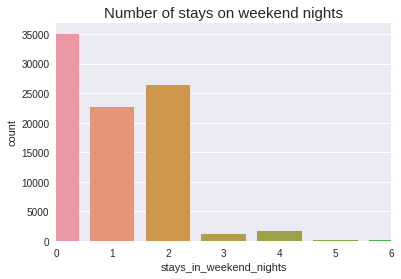

In [ ]:
sns.countplot(data = df1, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 15)
plt.xlim(0,6)

**Observation 18:**
Majority of the stays are over the weekday's night. Whatever we saw for the chart on day of the month was random.

**19. Which channel is contributing most for early booking of the hotel?**

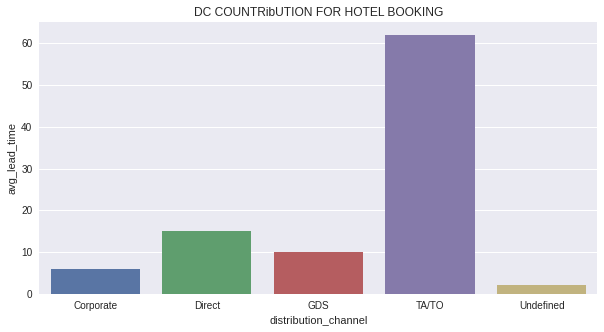

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'avg_lead_time'})



plt.figure(figsize = (10,5))
sns.barplot(x = d2['distribution_channel'], y = d2['avg_lead_time'])
plt.title("DC COUNTRibUTION FOR HOTEL BOOKING")
plt.show()

**Observation 19:**
1. We concluded that the most of the bookings we have received from TA/TO.

2. Other than undefined the least booking we have received from Corporate.

**20.Which distribution channel brings better revenue generating deals for hotels?**

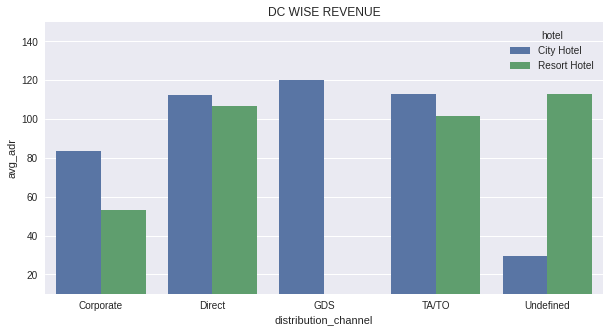

In [ ]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})


plt.figure(figsize = (10,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(10,150)
plt.title("DC WISE REVENUE")
plt.show()


**Observation 20:**

1.In terms of revenue GDS is the most revenue generating Channel but its only for City hotel. For Resort Hotel its contribution is negligible as compared to other channels distribution.

2.Undefined can be associated to multiple channel distribution channels whose data is not provided so after undefined bookings from TA/TO are generating most revenue for the Resort Hotel.

3.Apart from other ditribution channel Direct bookings are also playing the crucial role in terms of revenue generation but we need to focus more on other less revenue generating mediums in order to increase the overall revenue.

### **Conclusion:**
1. City Hotel is more preferred by guest as compared to Resort Hotel. Thus, City hotel has maximum bookings as compared to Resort Hotel.
2. The Agent ID- 9 had done most of the bookings.
3. 27.5 % of the bookings is cancelled.
4. Repeated guest are less in numbers that is 3.9% only.
In order to retained the guests/customers, management should take feedbacks from guests and try to imporve the services.
5. Transient customer type is most which is 82.4 % while percentage of bookings associated by other groups is vey low.
6. Almost 82% of the bookings was not changed by guests while approx. 10% bookings was changed by guests.
7.
a) The most preferred food by the customers is BB (Bed and Breakfast).           
b)HB (Half Board) and SC (Self catering) are equally preferred.
8. Most of the guests are coming from Portugal (PRT) that is more than 25000 guests.
9.  The most preferred room type is A.
10. July and August months had the most Bookings. Summer vaccation can be the reason for bookings.
11.
a) 2016 Year has the most bookings.                                              
b) 2015 has less than 10,000 bookings                                            
c) While overall city hotels had the most of the bookings.
12. City Hotels have the highest percentage of booking cancellation as compared to Resort Hotels.
13. 93.8 % guests did not required the parking space. Only 6.2 % guests required only 1 parking space.
14. 98.7 % of the guests prefer No deposit type of stay.
15. The optimal stay in both types of hotels is less than 7 days.
16. a) City hotels has slightly high average lead time than resort hotel.
 
    b) Hence, city hotel makes slightly more revenue then resort hotel.
17. a) City hotel has significantly longer waiting time then resort hotel.

    b) Hence, City Hotel is much busier than Resort Hotel.
18. Majority of the stays are over the weekday's night. Whatever we saw for the chart on day of the month was random.

19. a) We concluded that the most of the bookings we have received from TA/TO.

    b) Other than undefined the least booking we have received from Corporate.

20. a) In terms of revenue GDS is the most revenue generating Channel but its   only for City hotel. For Resort Hotel its contribution is negligible as compared to other channels distribution.
   
    b) Undefined can be associated to multiple channel distribution channels   whose data is not provided so after undefined bookings from TA/TO are generating most revenue for the Resort Hotel.

    c) Apart from other ditribution channel Direct bookings are also playing the crucial role in terms of revenue generation but we need to focus more on other less revenue generating mediums in order to increase the overall revenue.


